In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [15]:
df = pd.read_csv("churn_prediction2.csv")
df.shape

(28382, 11)

In [16]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [17]:
df.isnull().sum()

customer_id                0
vintage                    0
age                        0
gender                   525
dependents              2463
occupation                80
city                     803
customer_nw_category       0
branch_code                0
churn                      0
last_transaction           0
dtype: int64

In [18]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

# Replace with -1 for missing gender
df['gender'] = df['gender'].fillna(-1)

# Replacing with max. occurence values
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)

In [19]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [20]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,churn,last_transaction,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,2101,66,1.0,0.0,self_employed,187.0,2,755,0,2019-05-21,0,0,0,1,0
1,2,2348,35,1.0,0.0,self_employed,1020.0,2,3214,0,2019-11-01,0,0,0,1,0
2,4,2194,31,1.0,0.0,salaried,146.0,2,41,0,NaT,0,0,1,0,0
3,5,2329,90,-1.0,0.0,self_employed,1020.0,2,582,1,2019-08-06,0,0,0,1,0
4,6,1579,42,1.0,2.0,self_employed,1494.0,3,388,1,2019-11-03,0,0,0,1,0


In [31]:
print(df["churn"].unique()) 

[0 1]


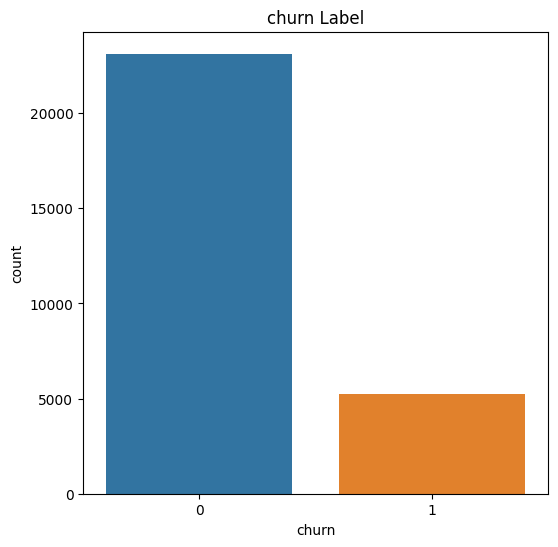

In [29]:
df.churn.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=df)
plt.title('churn Label')
plt.show()

In [21]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['churn','customer_id', 'occupation', 'last_transaction'], axis=1)
y = df['churn']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [22]:
y_train.shape, y_test.shape

((22705,), (5677,))

In [23]:
y_train.value_counts()/len(y_train)

0    0.814666
1    0.185334
Name: churn, dtype: float64

In [24]:
y_test.value_counts()/len(y_test)

0    0.814691
1    0.185309
Name: churn, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [27]:
#smote technique
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18497})
